In [1]:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import seaborn as sns
import time


# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)


data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

In [3]:
data.head(1)

,Fecha_hora,IP Origen,Destino IP,Puerto_origen,Puerto_destino,Protocolo,Longitud_paquete,Tipo_paquete,Tipo,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta_x,Indicadores_malware,Puntuaciones_anomalias,Tipo_ataque,Firma_ataque,respuesta_tomada,Nivel_severidad,Informacion_usuario,Informacion_dispositivo,Segmento_red,Datos_geolocalizacion,Información_proxy,Registros_cortafuegos,Fuente_registro
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",4,normal,IoC Detected,2867,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Server


In [3]:
#dividir la fecha y la hora en dos columnas


# Convertimos la columna "Fecha_hora" a datetime
data["Fecha_hora"] = pd.to_datetime(data["Fecha_hora"])

# Creamos dos nuevas columnas, una para la fecha y otra para la hora
data["Fecha"] = data["Fecha_hora"].dt.date
data["Hora"] = data["Fecha_hora"].dt.time



In [5]:
data.drop(columns="Fecha_hora", inplace=True)

In [104]:
columnas_descarte = ["Puerto_origen","Puerto_destino","Protocolo","Longitud_paquete","Tipo_paquete","Tipo","Cluster", "Firma_ataque","respuesta_tomada","Segmento_red","Información_proxy",	"Registros_cortafuegos","Fuente_registro" ]

nuevo_data = data.drop(columns=columnas_descarte)

#nuevo_data.head(1)

In [105]:
#nos quedamos con algunas columnas y en un orden

columnas_elegidas = ["Año", "Fecha", "Hora", "IP Origen", "Destino IP","Datos_geolocalizacion","Tipo_ataque","Nivel_severidad","Datos_carga_util","Resultado_analisis","Etiqueta_x","Informacion_usuario","Informacion_dispositivo", "Indicadores_malware", "Puntuaciones_anomalias"]

# Crear un nuevo DataFrame con las columnas seleccionadas y en el orden deseado
ciber_modificado_orden = data[columnas_elegidas].copy()



In [106]:
# l guardo
ciber_modificado_orden.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado_orden.xlsx")

In [24]:
df= pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado_orden.xlsx")

In [ ]:


# Convertir la columna 'Fecha_hora' a formato datetime
data['Fecha_hora'] = pd.to_datetime(data['Fecha_hora'])



#creo la figura
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle("Distribucion y numero de ataques desde 2020 a 2023")
axs = axs.flatten()

# Ajuste del ancho de las barras
bar_width = 0.3

# Distribución de Ataques
sns.countplot(x='Tipo_ataque', data=data, ax=axs[0], width=bar_width)
axs[0].set_title('Distribución de Ataques')
axs[0].set_xlabel('Tipo de Ataque')
axs[0].set_ylabel('Número de Incidentes')

# Análisis Temporal
data['Año'] = data['Fecha_hora'].dt.year
sns.countplot(x='Año', data=data, ax=axs[1],width=bar_width)
axs[1].set_title('Número de Ataques')
axs[1].set_xlabel('Años')
axs[1].set_ylabel('Número de Incidentes')

# Consecuencias y Respuestas
sns.countplot(x='Nivel_severidad', data=data, ax=axs[2],width=bar_width)
axs[2].set_title('Nivel de Severidad de los Ataques')
axs[2].set_xlabel('Nivel de Severidad')
axs[2].set_ylabel('Número de Incidentes')

# Frecuencia de Protocolos
sns.countplot(x='Protocolo', data=data, ax=axs[3],width=bar_width)
axs[3].set_title('Frecuencia de Protocolos en Ataques')
axs[3].set_xlabel('Protocolo')
axs[3].set_ylabel('Número de Incidentes')





# Mostrar la gráfica
plt.tight_layout()
plt.show()






In [25]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Anyo,Fecha,Hora,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Etiqueta_x,Informacion_usuario,Informacion_dispositivo,Indicadores_malware,Puntuaciones_anomalias
0,0,0,2023,2023-05-30,06:33:58,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",normal,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,2867
1,1,1,2020,2020-08-26,07:08:30,78.199.217.198,66.191.137.154,"Bilaspur, Nagaland",Malware,Low,Aperiam quos modi officiis veritatis rem. Omni...,"{'entidades': ['Aperiam', 'Illo', 'Quidem', 'C...",anómala,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,IoC Detected,515
2,2,2,2022,2022-11-13,08:23:25,63.79.210.48,198.219.82.17,"Bokaro, Rajasthan",DDoS,Low,Perferendis sapiente vitae soluta. Hic delectu...,"{'entidades': ['quae'], 'partes_del_discurso':...",anómala,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,IoC Detected,8742
3,3,3,2023,2023-07-02,10:38:46,163.42.196.10,101.228.192.255,"Jaunpur, Rajasthan",Malware,Medium,Totam maxime beatae expedita explicabo porro l...,"{'entidades': ['porro labore', 'Minima', 'fugi...",normal,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,NaN,1579
4,4,4,2023,2023-07-16,13:11:07,71.166.185.76,189.243.174.238,"Anantapur, Tripura",DDoS,Low,Odit nesciunt dolorem nisi iste iusto. Animi v...,"{'entidades': ['nisi', 'Animi', 'illo repellen...",normal,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,NaN,52


In [10]:
#modifico año por anyo
A= df.rename(columns={"Año":"Anyo"}, inplace=True)

In [13]:
# l guardo
df.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado_orden.xlsx")

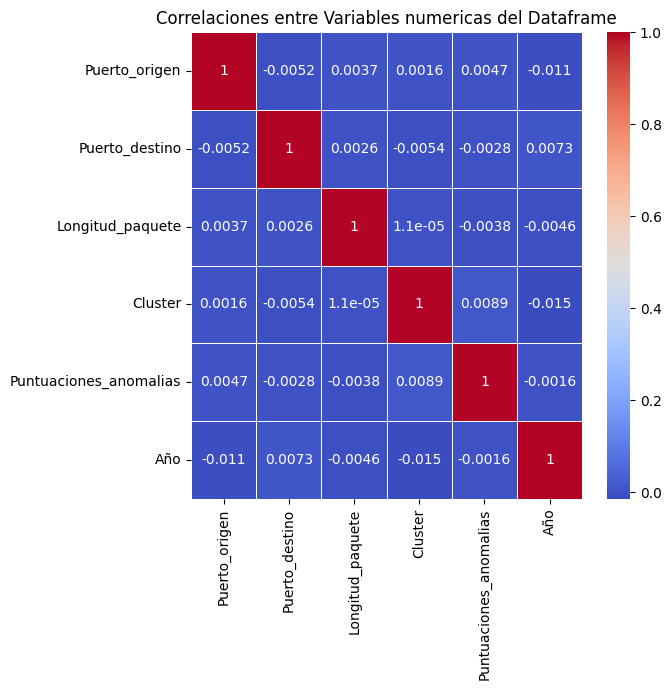

In [78]:

# Correlaciones y Relaciones

# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include='number')
plt.figure(figsize= (7,7), edgecolor="b")
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables numericas del Dataframe')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [ ]:
df.describe()

In [ ]:
df

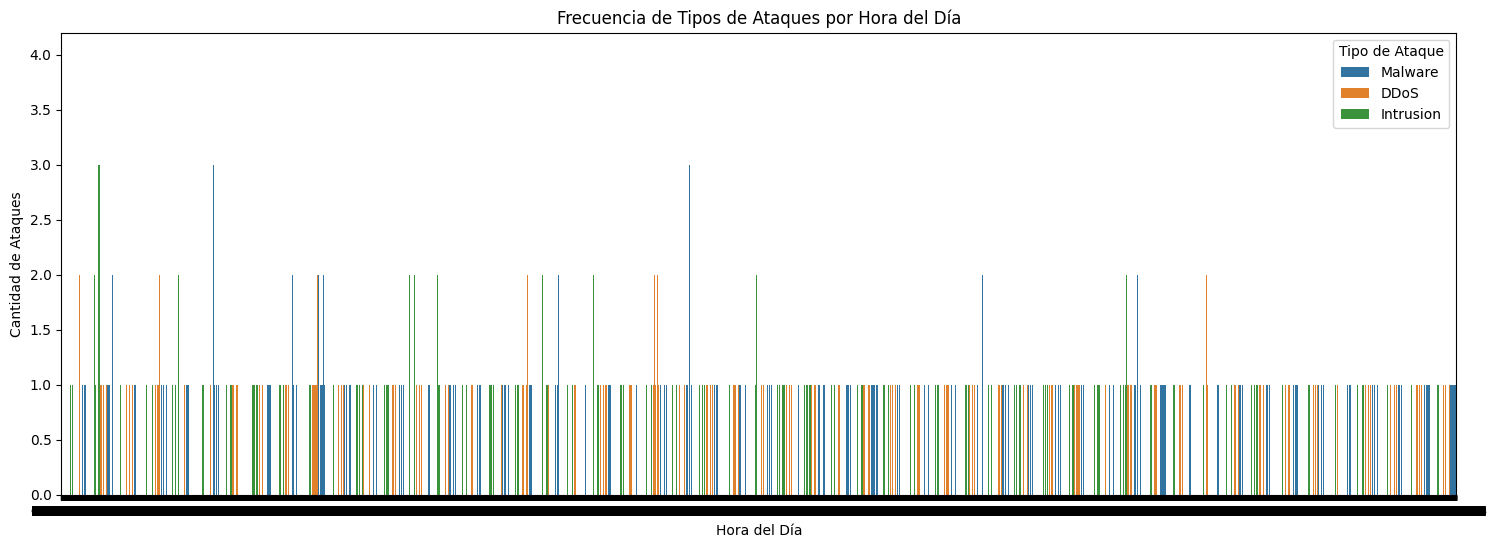

In [22]:
##Análisis de tipo de ataque:

# Gráfico de barras para la frecuencia de tipos de ataques por hora
plt.figure(figsize=(18, 6))
sns.countplot(x='Hora', hue='Tipo_ataque', data=df)
plt.title('Frecuencia de Tipos de Ataques por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Ataques')
plt.legend(title='Tipo de Ataque', bbox_to_anchor=(1, 1))
plt.show()
